#  Coding Assignment #3 - Fraud Detection Models

In [1]:
# Check current conda env and show channels
!conda info


     active environment : base
    active env location : /home/dima/anaconda3
            shell level : 1
       user config file : /home/dima/.condarc
 populated config files : 
          conda version : 24.5.0
    conda-build version : 24.5.1
         python version : 3.12.4.final.0
                 solver : libmamba (default)
       virtual packages : __archspec=1=skylake
                          __conda=24.5.0=0
                          __glibc=2.31=0
                          __linux=5.15.0=0
                          __unix=0=0
       base environment : /home/dima/anaconda3  (writable)
      conda av data dir : /home/dima/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/linux-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/linux-64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /home/dima

In [164]:
# Bring in dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours, NearMiss
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.tree import plot_tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)


--- First 5 rows of data ---
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0        

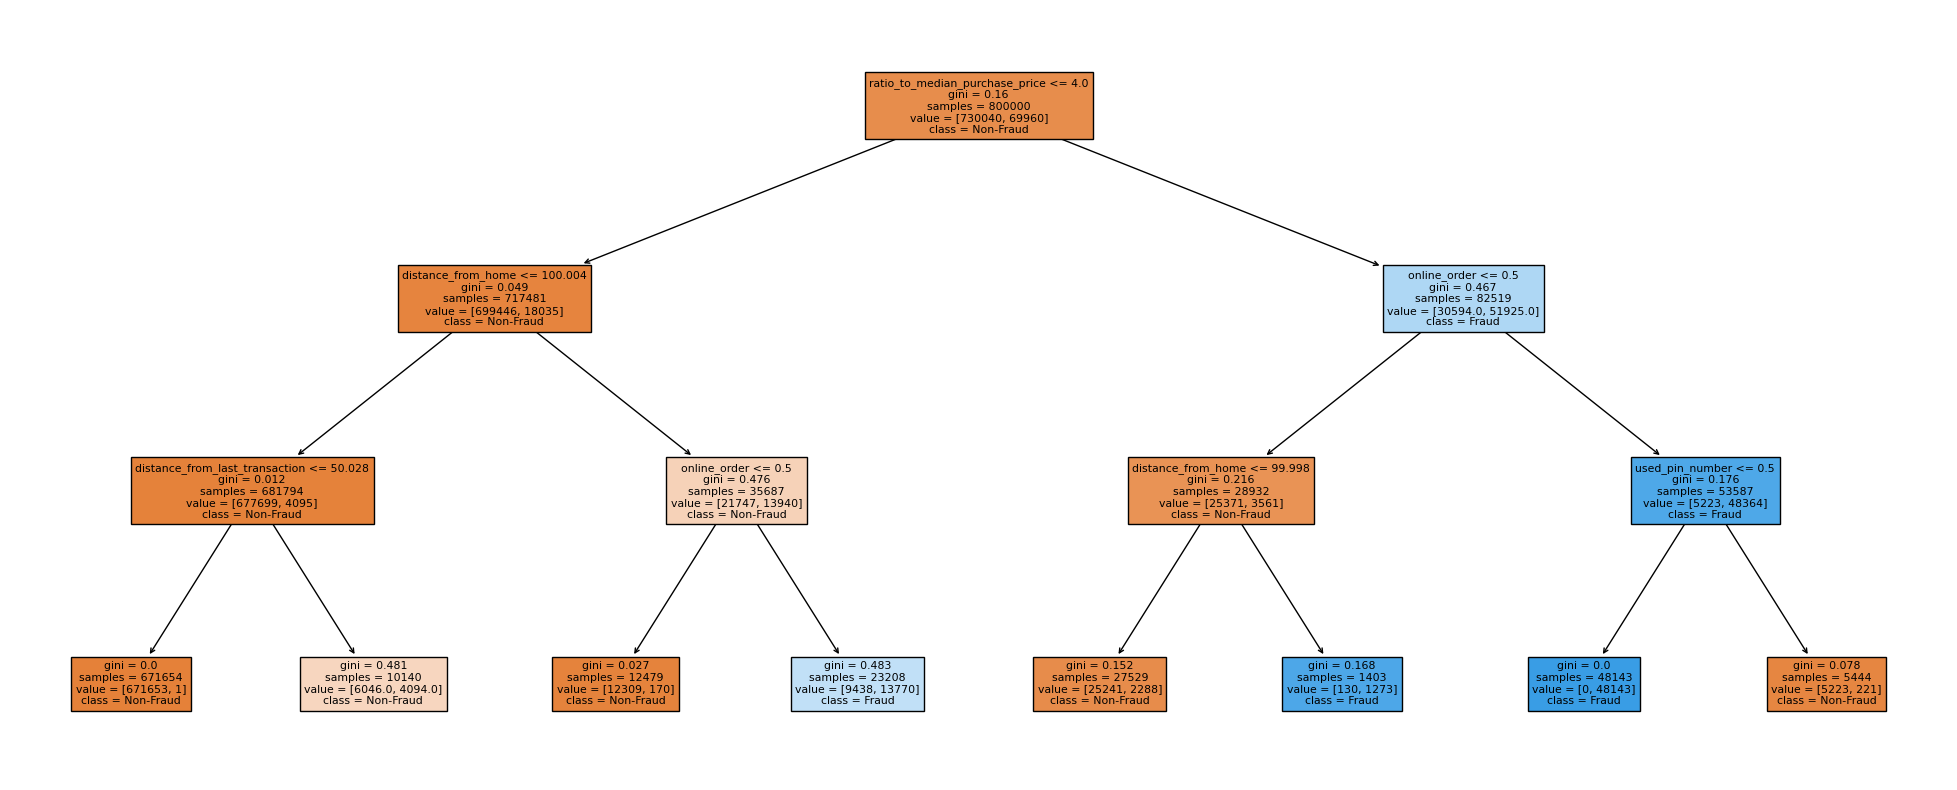

In [131]:
# Print the top 5 rows
print("\n--- First 5 rows of data ---")
print(data.head(5))

# Print summary stats
print("\n--- Summary Statistics ---")
print(data.describe())

# Event rate
print("\n--- Event Rate ---")
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier
model_dtc = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree

# Train the model on the training data
model_dtc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dtc = model_dtc.predict(X_test)

# Evaluate the model
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
confusion_dtc = confusion_matrix(y_test, y_pred_dtc)
classification_rep_dtc = classification_report(y_test, y_pred_dtc)

# Print the results
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy_dtc:.2f}")
print("Confusion Matrix:")
print(confusion_dtc)
print("Classification Report:")
print(classification_rep_dtc)

# Visualize the decision tree
plt.figure(figsize=(25, 10))
plot_tree(model_dtc, 
          filled=True, 
          feature_names=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
                         'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
          class_names=['Non-Fraud', 'Fraud'])
plt.show()

# Introduction to Fraud Detection Assignment

In this assignment, you will embark on an analytical journey to explore and model a dataset of card transactions with the aim of detecting fraudulent activities. The provided dataset includes various features such as distance from home, transaction details, and purchase patterns, which are essential in understanding the characteristics of fraudulent transactions. You will use Python and key machine learning libraries to analyze this dataset, build a classification model, and evaluate its performance.

## Base Code Provided
- The base code includes necessary Python imports and a decision tree model for initial analysis.
- You will start with a dataset of card transactions, exploring its structure, summary statistics, and event rate.
- The base code will guide you through data loading, preprocessing, model training, and evaluation.
- A visual representation of the decision tree will be created to help understand the model's decision-making process.

## Your Tasks
- **Data Analysis**: Deepen your understanding of the dataset by performing additional exploratory data analysis.
- **Model Building and Evaluation**: Beyond the decision tree, experiment with another model such as Random Forest to compare performance.
- **Performance Metrics**: Evaluate models using metrics like precision, recall, and F1-score, and understand the implications of these metrics in the context of fraud detection.
- **Advanced Techniques** (Extra Credit): Implement data balancing, feature importance analysis, and cross-validation to enhance model performance and robustness.

## Learning Outcomes
- Gain practical experience in handling real-world datasets.
- Develop skills in building and evaluating classification models.
- Learn to interpret model results and make data-driven decisions.
- Explore advanced machine learning techniques (optional extra credit).

## Submission Guidelines
- Submit your enhanced code with clear documentation and comments.
- Include a report or inline comments analyzing your findings and model performances.
- Ensure your code is clean, well-organized, and reproducible.


# Paul's Code

## Fraud Detection Model Workflow Summary

1. **Import Libraries**
   - `pandas` for data handling.
   - `numpy` for numerical operations.
   - `sklearn` for machine learning tools.
   - `matplotlib` for data visualization.

2. **Load Dataset**
   - Data is loaded from a remote URL using `pandas.read_csv`.

3. **Initial Data Exploration**
   - Initial examination using `data.head()` and `data.tail()` to understand dataset structure.

4. **Data Preparation**
   - Features (`X`) and target variable (`y`) are defined.
   - `fraud` column is the target, while others are features.

5. **Data Splitting**
   - Dataset is split into training and test sets.
   - `train_test_split` is used, with a test size of 20%.

6. **Model Initialization**
   - Decision Tree Classifier initialized with a maximum depth of 3.
   - Limits complexity and overfitting of the model.

7. **Model Training**
   - Model is trained using the training set (`X_train`, `y_train`).

8. **Prediction and Evaluation**
   - Model predictions made on the test set.
   - Evaluation using accuracy, confusion matrix, and classification report.

9. **Visualization**
   - Decision tree visualized using `matplotlib` and `sklearn.tree.plot_tree`.
   - Helps in understanding the decision-making process of the model.

# Commentary
- This code effectively demonstrates the end-to-end process of a machine learning project.
- Decision trees are a good choice for fraud detection due to their interpretability.
- The model is simple yet provides a decent understanding of the basic approach to fraud detection in financial transactions.
- Visualization is a key aspect, especially in complex domains like fraud detection, for understanding the model's decision criteria.

# Model Performance Analysis and Commentary

- **Data Overview**
  - First 5 rows show a mix of numerical features like `distance_from_home`, `distance_from_last_transaction`, etc., crucial for predicting fraud.
  - Summary statistics indicate a varied distribution of values, with some features having a wide range (e.g., `distance_from_home`).

- **Model Accuracy**
  - High accuracy of 98% suggests the model is very effective in classifying transactions as fraudulent or non-fraudulent.

- **Confusion Matrix Analysis**
  - Low number of false positives (2481) and false negatives (1646) compared to true positives and negatives.
  - Indicates a good balance in identifying both fraudulent and non-fraudulent transactions accurately.

- **Classification Report Insights**
  - High precision (0.99) for class 0 (Non-Fraud) and good precision (0.86) for class 1 (Fraud).
  - Recall is also high for both classes, especially for class 1 (0.91), which is critical in fraud detection.
  - F1-scores are robust, indicating a balanced model considering both precision and recall.

- **Overall Evaluation**
  - The decision tree model shows excellent performance in identifying fraud.
  - The balance between precision and recall, especially for fraud detection (class 1), is commendable.
  - High accuracy combined with the detailed metrics suggest a well-tuned model for this dataset.
  - The model could be further improved by exploring feature engineering, trying other algorithms, or tuning hyperparameters.


# Coding Assignment:  Comparative Analysis of Fraud Detection Models

## Objective
Enhance your skills in model evaluation and comparison in a real-world application: fraud detection. Using the provided Decision Tree model and dataset of card transactions, you will build a Random Forest model and compare its performance against the Decision Tree model.

## Tasks
1. **Model Building**:
   - Build a Random Forest model using the provided dataset.
2. **Model Evaluation**:
   - Calculate and interpret the precision and recall for the Random Forest model.
   - Generate and interpret the confusion matrix for the Random Forest model.
3. **Comparative Analysis**:
   - Compare the performance of the Decision Tree and Random Forest models using precision, recall, and confusion matrices.
   - Visualize the comparison using a bar chart.
4. **Reflection and Discussion**:
   - Discuss your findings, comparing the two models. Reflect on model performance, suitability for fraud detection, and potential issues like overfitting.

## Grading Rubric

**Total Points: 100**

1. **Model Building (30 Points)**:
   - Successfully building a Random Forest model: 30 points

2. **Model Evaluation (40 Points)**:
   - Correct calculation of precision and recall for the Random Forest model: 20 points
   - Correct generation and interpretation of the Random Forest confusion matrix: 20 points

3. **Comparative Analysis (20 Points)**:
   - Accurate comparison of model performance (including the provided Decision Tree model): 10 points
   - Clear and correct visualization using a bar chart: 10 points

4. **Reflection and Discussion (10 Points)**:
   - Cohesive and thoughtful discussion comparing the two models: 10 points

## Submission Guidelines
- Submit your work in a Jupyter Notebook or as a Python script with comments explaining your steps. You can also include your discussion in the notebook, as comments in your script, or in a separate text file.
- Ensure your plots and tables are clearly labeled and legible.

## Notes
- Be sure to demonstrate your understanding of the task and the models.


# Extra Credit: Advanced Model Enhancement and Evaluation

## Objective
Advance your data science expertise by applying more sophisticated techniques in model enhancement and evaluation within the context of fraud detection. This extra credit section includes data balancing, implementing cross-validation, and conducting a feature importance analysis.

## Tasks
1. **Balancing the Data**:
   - Utilize a technique like SMOTE or undersampling to balance the dataset.
   - Rebuild the Random Forest model using the balanced dataset.
2. **Cross-Validation**:
   - Implement 5-fold cross-validation for the Random Forest model.
   - Analyze the model's performance and stability based on cross-validation results.
3. **Feature Importance Analysis**:
   - Determine feature importance using the Random Forest model.
   - Present the feature importances in a table and a graph.

## Extra Credit Grading Rubric

**Total Points: 50**

1. **Balancing the Data (15 Points)**:
   - Correct application of a technique to balance the dataset: 7 points
   - Successful rebuilding of the Random Forest model with balanced data: 8 points

2. **Cross-Validation (20 Points)**:
   - Proper implementation of 5-fold cross-validation: 10 points
   - Comprehensive analysis of cross-validation results: 10 points

3. **Feature Importance Analysis (15 Points)**:
   - Accurate determination of feature importances: 7 points
   - Clear and informative presentation of feature importances in a table and graph: 8 points

## Submission Guidelines for Extra Credit
- Include your extra credit work in the same Jupyter Notebook or Python script as the main assignment.
- Clearly label the sections and outputs for the extra credit tasks.
- Ensure your analysis and visualizations are comprehensible and well-explained.

## Notes
- This extra credit section is optional and designed for students interested in deeper exploration of data science techniques.
- Focus on the quality of analysis and clarity of presentation for awarding points in this section.


---

# Submission

 ## Data Analysis: 
 - Deepen your understanding of the dataset by performing additional exploratory data analysis.

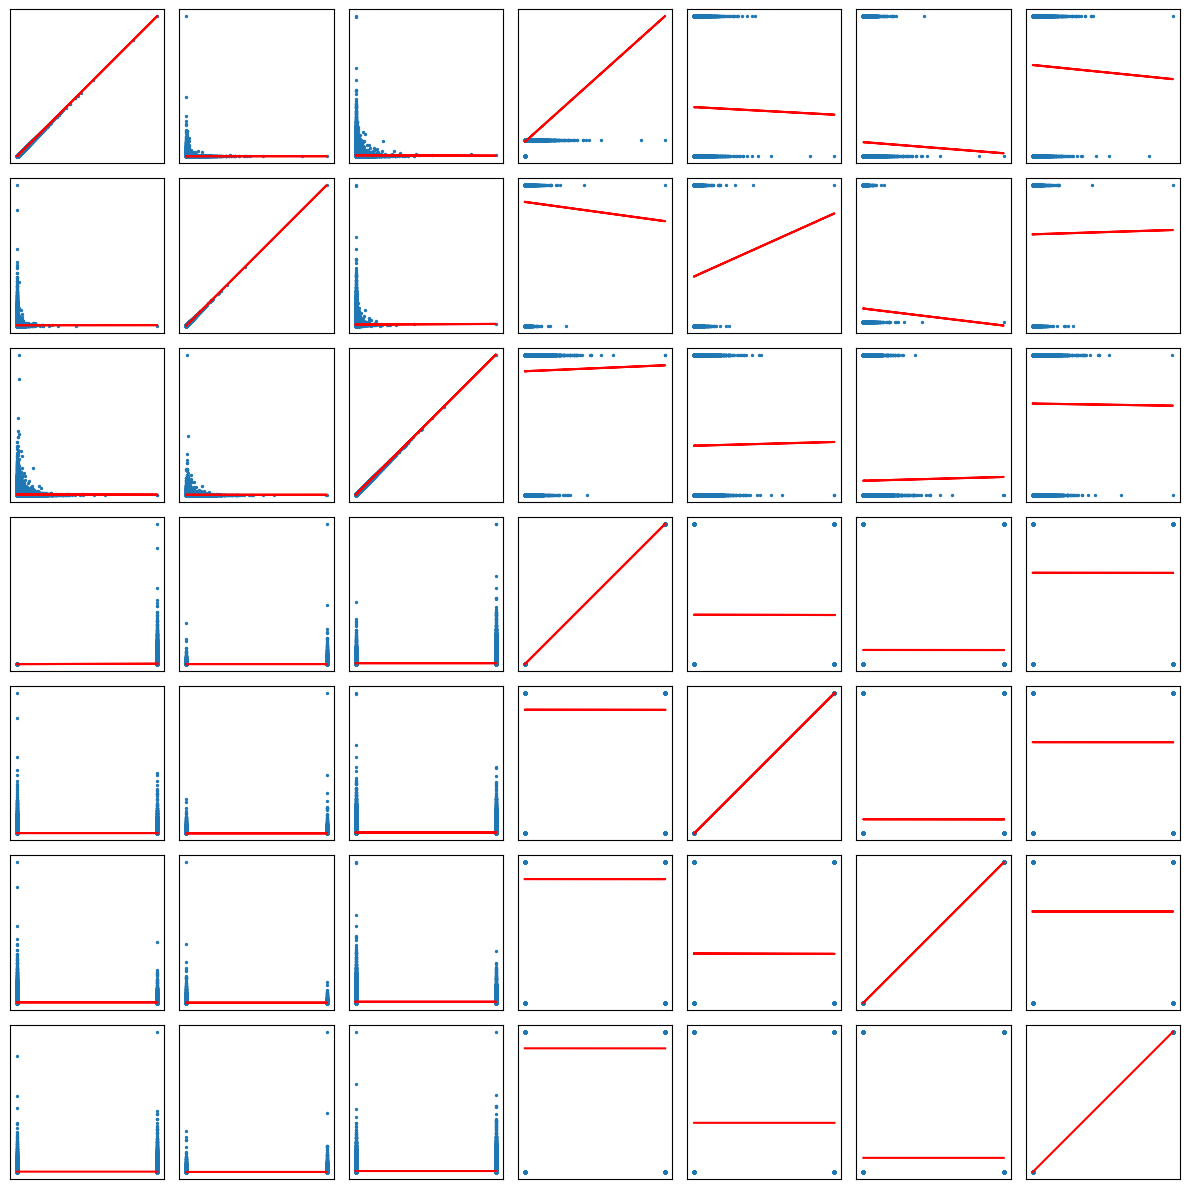

In [122]:
#@title Pairplot suggests some non-linearity of relationships
fig, axes = plt.subplots(figsize=(12, 12), nrows=len(predictors), ncols=len(predictors))
X = data.drop(columns=['fraud']) # Get predictrors

predictors = list(X.columns.values) # Grab their names

for i, x in enumerate(predictors):
   for j, y in enumerate(predictors):
       ax = axes[i, j]
       ax.scatter(data[x], data[y], s=2)
       z = np.polyfit(data[x], data[y], 1)
       p = np.poly1d(z)
       ax.plot(data[x], p(data[x]), color='r')
       ax.set_xticks([])
       ax.set_yticks([])

plt.tight_layout()
plt.show()

In [123]:
# @title Checking missing values
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [255]:
# @title Logic to get different samples of majority/minority classes

def sample_data(data, target, test_size=0.2, sampling_strategy='default', show_plots=False):
    """
    Split dataset into train and test sets with optional sampling strategies, 
    and visualize class imbalances if requested.
    
    Parameters:
        data (pd.DataFrame): Tabular dataset.
        target (str): Name of the target column.
        test_size (float): Proportion of data to use for testing.
        sampling_strategy (str): Sampling strategy ('default', 'SMOTE', 'ENN', 'SMOTEENN', 'NearMiss').
        show_plots (bool): If True, show bar plots of class distribution.

    Returns:
        X_train (pd.DataFrame): Training features.
        X_test (pd.DataFrame): Testing features.
        y_train (pd.Series): Training target.
        y_test (pd.Series): Testing target.
    """
    # Separate features and target
    X = data.drop(columns=[target])
    y = data[target]
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )
    
    # Save original class distributions
    original_train_counts = Counter(y_train)
    original_test_counts = Counter(y_test)
    
    # Apply sampling strategy
    sampler = None
    sampling_title = "No Sampling"
    
    if sampling_strategy == 'SMOTE':
        sampler = SMOTE(random_state=42)
        sampling_title = "SMOTE Oversampling"
    elif sampling_strategy == 'ENN':
        sampler = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=50)
        sampling_title = "ENN Undersampling"
    elif sampling_strategy == 'NearMiss':
        sampler = NearMiss(version=3)
        sampling_title = "NearMiss Undersampling"
    elif sampling_strategy == 'SMOTEENN':
        sampler = SMOTEENN(random_state=42)
        sampling_title = "SMOTEENN Combination"
    
    if sampler:
        X_train, y_train = sampler.fit_resample(X_train, y_train)
    
    # Visualize class distributions if requested by show_plots=True
    if show_plots:
        # Current class distributions
        train_counts = Counter(y_train)
        test_counts = Counter(y_test)
        
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Original distributions
        axes[0].bar(
            [f"Train - {label}" for label in original_train_counts.keys()],
            [original_train_counts[label] for label in original_train_counts.keys()],
            label="Train (Original)"
        )
        axes[0].bar(
            [f"Test - {label}" for label in original_test_counts.keys()],
            [original_test_counts[label] for label in original_test_counts.keys()],
            label="Test (Original)"
        )
        axes[0].set_title("Original Class Distribution")
        axes[0].set_ylabel("Frequency")
        axes[0].legend()
        for i, label in enumerate(original_train_counts.keys()):
            # Add percentages on top of train bars
            train_percent = original_train_counts[label] / sum(original_train_counts.values()) * 100
            axes[0].text(i, original_train_counts[label] + 1, f"{train_percent:.1f}%", ha='center', fontsize=14)
        
        for i, label in enumerate(original_test_counts.keys()):
            # Add percentages on top of test bars
            test_percent = original_test_counts[label] / sum(original_test_counts.values()) * 100
            axes[0].text(i + len(original_train_counts), original_test_counts[label] + 1, f"{test_percent:.1f}%", ha='center', fontsize=14)
        
        # Sampled distributions
        axes[1].bar(
            [f"Train - {label}" for label in train_counts.keys()],
            [train_counts[label] for label in train_counts.keys()],
            label="Train (Sampled)"
        )
        axes[1].bar(
            [f"Test - {label}" for label in test_counts.keys()],
            [test_counts[label] for label in test_counts.keys()],
            label="Test"
        )
        axes[1].set_title(f"Class Distribution After {sampling_title}")
        axes[1].set_ylabel("Frequency")
        axes[1].legend()
        for i, label in enumerate(train_counts.keys()):
            # Add percentages on top of train bars
            train_percent = train_counts[label] / sum(train_counts.values()) * 100
            axes[1].text(i, train_counts[label] + 1, f"{train_percent:.1f}%", ha='center', fontsize=14)
        
        for i, label in enumerate(test_counts.keys()):
            # Add percentages on top of test bars
            test_percent = test_counts[label] / sum(test_counts.values()) * 100
            axes[1].text(i + len(train_counts), test_counts[label] + 1, f"{test_percent:.1f}%", ha='center', fontsize=14)

        plt.tight_layout()
        plt.show()

    return X_train, X_test, y_train, y_test

In [256]:
# @title Logic to double check correlated features of T_train predictors after running the sampling strategy

def check_predictors(X_train):
    """
    Analyze predictors for multicollinearity and visualize correlations and VIF scores.
    
    Parameters:
        X_train (pd.DataFrame): Training features.
        
    Returns:
        None. Displays heatmap of correlations and VIF plot.
    """
    # Calculate correlation matrix
    correlation_matrix = X_train.corr()
    
    # Calculate VIF for each predictor
    vif_data = pd.DataFrame({
        "Feature": X_train.columns,
        "VIF": [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    })
    
    # Create plots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Heatmap of correlations
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[0])
    axes[0].set_title("Correlation Heatmap of Predictors")
    
    # Bar plot of VIF values
    axes[1].bar(vif_data["Feature"], vif_data["VIF"], color='skyblue')
    axes[1].axhline(y=5, color='red', linestyle='--', label='VIF Threshold (5)')
    axes[1].set_title("Variance Inflation Factor (VIF)")
    #axes[1].set_xlabel("Features")
    axes[1].set_ylabel("VIF Score")
    axes[1].legend()
    axes[1].tick_params(axis='x', rotation=90)
    
    plt.tight_layout()
    plt.show()

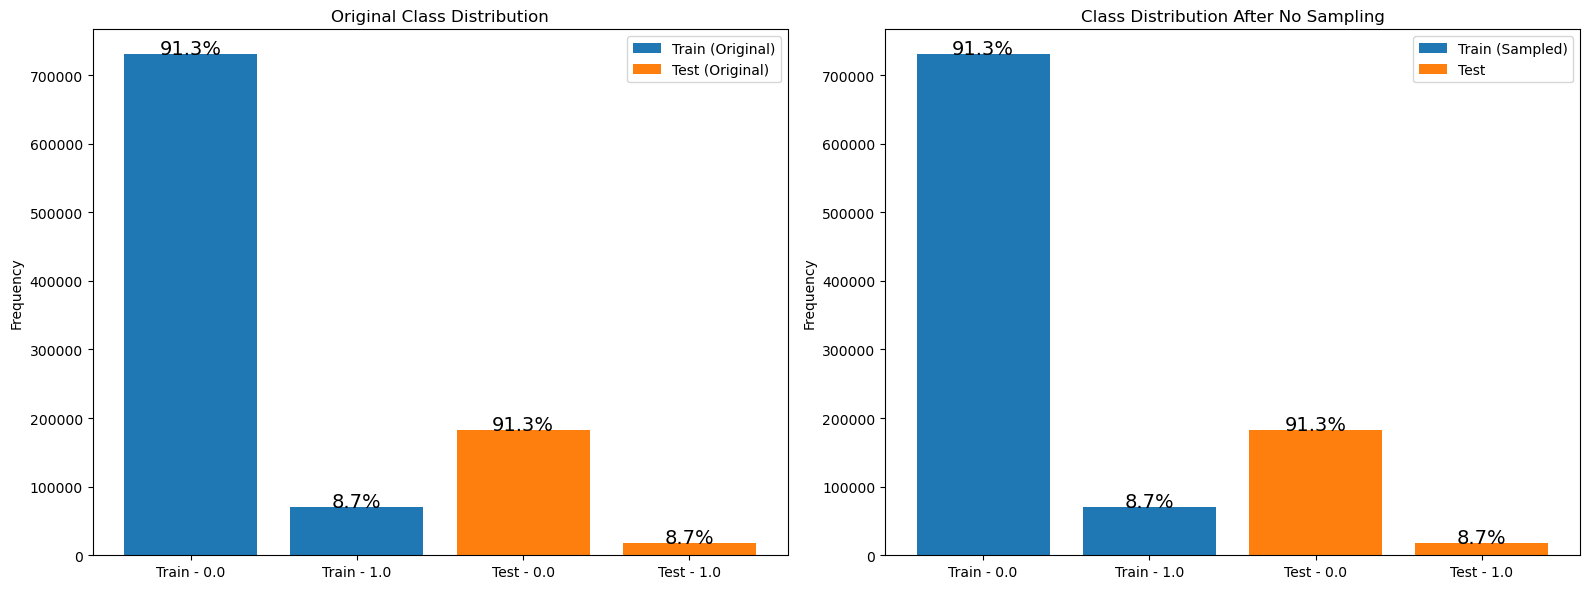

In [257]:
# @title Default (or basecase) train/test split, i.e. use all the data
X_train, X_test, y_train, y_test = sample_data(data, 'fraud', test_size=0.2, sampling_strategy='default', show_plots=True)

**Note on sensitivity to correlated features:**
Decision Trees and Random Forests can struggle with correlated features, often splitting on one arbitrarily and inflating its importance. In contrast, XGBoost is less prone to this issue because it builds trees sequentially and adjusts for prior splits.

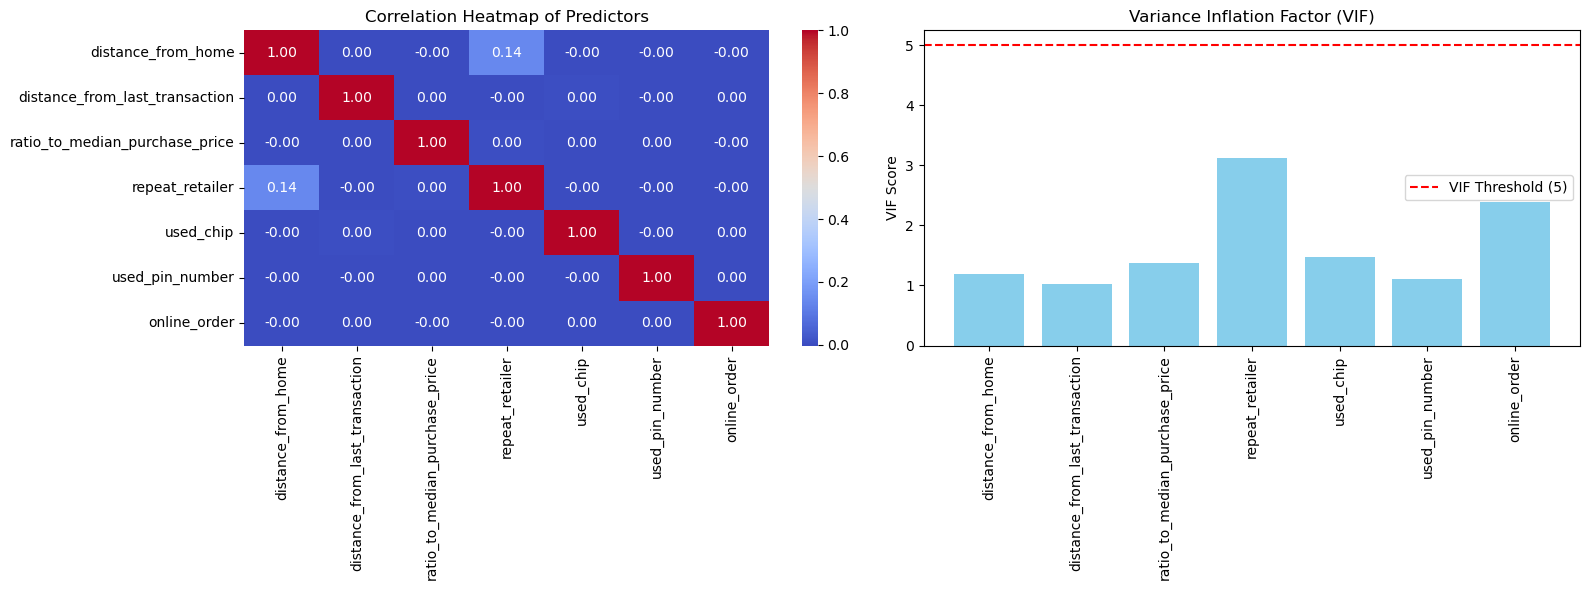

In [258]:
# @title Default correlations
check_predictors(X_train)

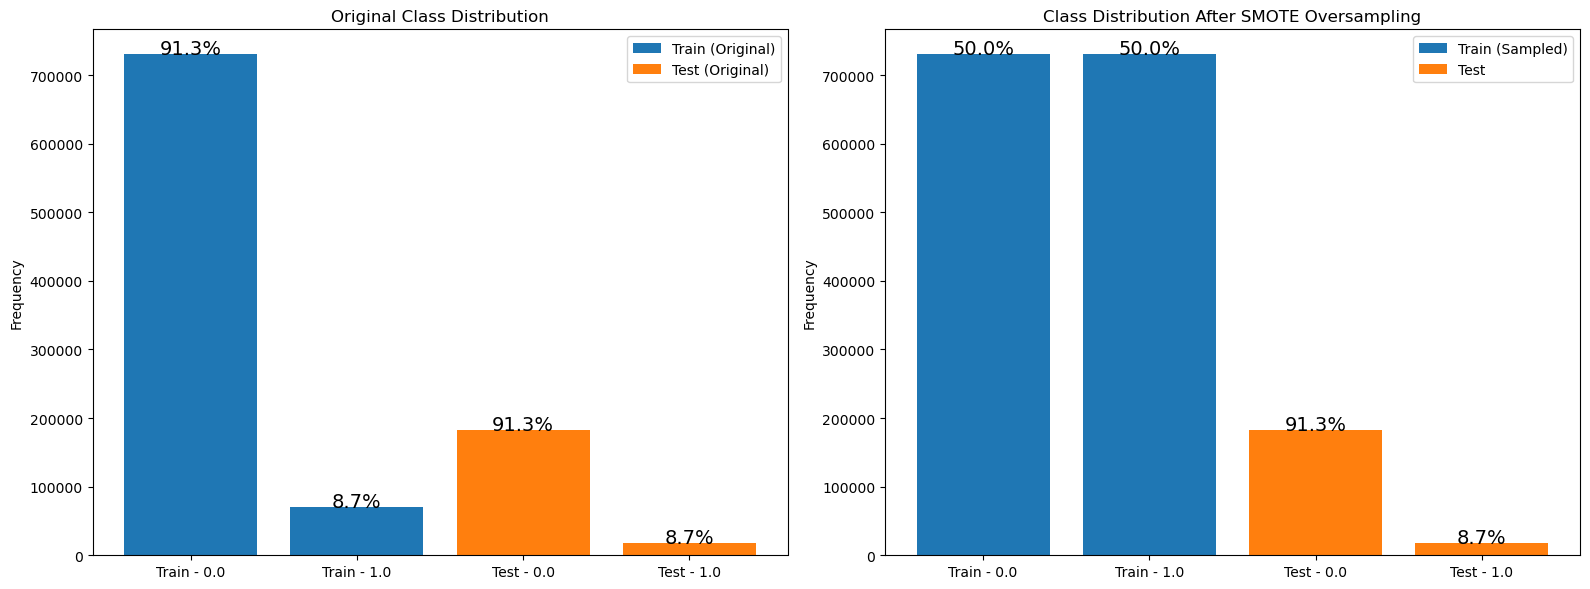

In [259]:
# @title SMOTE (synthetic minority) train/test split, i.e. correcting imbalanced classes by oversampling
X_train, X_test, y_train, y_test = sample_data(data, 'fraud', test_size=0.2, sampling_strategy='SMOTE', show_plots=True)

**Note on increasing correlations:**
As expected, oversampling increases correlations sometimes x10 but the resulant relations are still within reasonable levels.

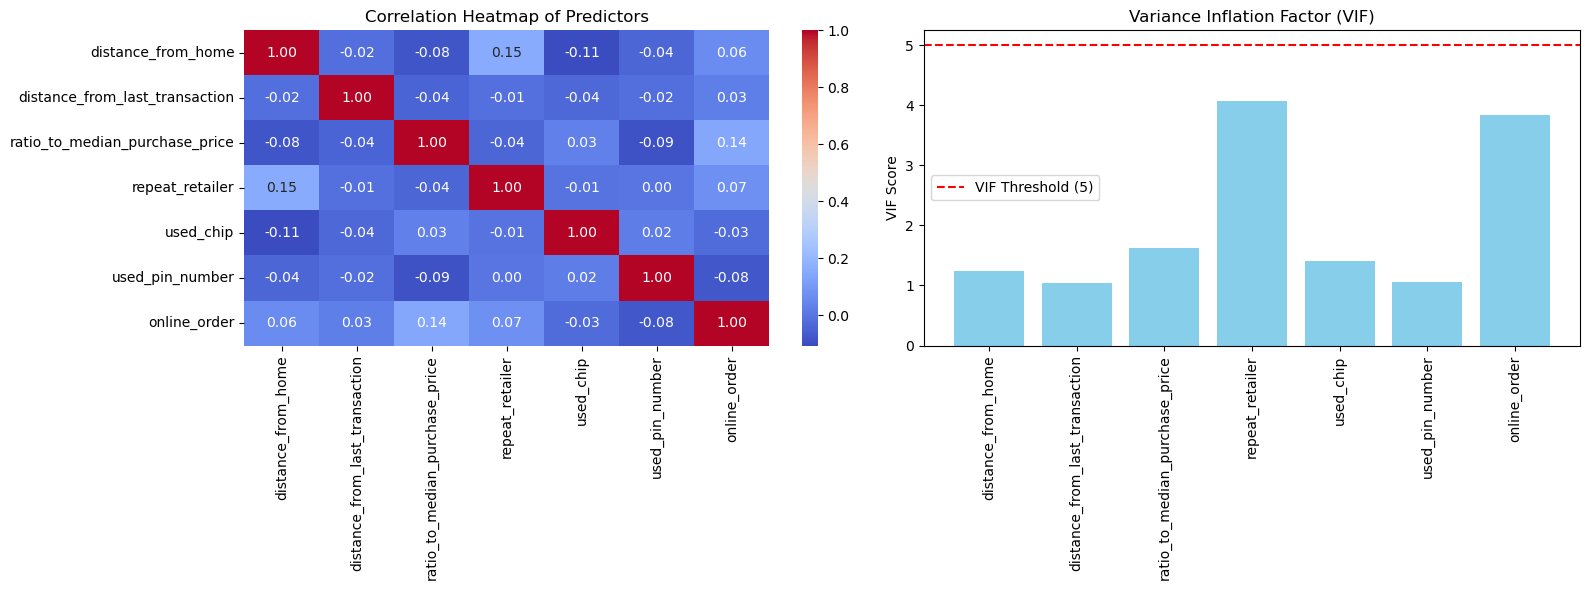

In [260]:
# @title Oversampled classes correlations
check_predictors(X_train)

## Model Building and Evaluation: 
- Beyond the decision tree, experiment with another model such as Random Forest to compare performance.

In [310]:
# # Re-import necessary libraries after environment reset
# from sklearn.metrics import (
#     accuracy_score,
#     precision_score,
#     recall_score,
#     roc_auc_score,
#     f1_score,
#     confusion_matrix,
#     ConfusionMatrixDisplay,
#     precision_recall_curve,
#     roc_curve,
#     auc,
# )
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

def test_model(data, target, model_name, cv_folds=1, results_df=None, sampling='default', show_plots=False, return_results=True):
    """
    Test a tree-based model with specified cross-validation strategy, and store results in a dataframe.

    Parameters:
        data (pd.DataFrame): Dataset containing features and target.
        target (str): Name of the target variable.
        model_name (str): Model to use ('DecisionTreeClassifier' or 'RandomForestClassifier').
        cv_folds (int): Number of cross-validation folds. If 1, perform a single train/test split.
        results_df (pd.DataFrame): DataFrame to store results. Create new if None.
        sampling (str): Sampling strategy used in sample_data method. Defaults to 'default'.
        show_plots (bool): If True, produce confusion matrix and AUC/Precision-Recall plots.
        return_results (bool): If True, return updated dataframe with model evaluation results, esle return model and X_test 

    Returns:
        results_df (pd.DataFrame): Updated dataframe with model evaluation results.
    """
    # Initialize results DataFrame if not provided
    if results_df is None:
        results_df = pd.DataFrame(
            columns=["Sampling Strategy", "Model", "CV Folds", "Accuracy", "Precision", "Recall", "AUC", "F1"]
        )

    # Choose model
    if model_name == "DecisionTreeClassifier":
        model = DecisionTreeClassifier(max_depth=3, random_state=42)
    elif model_name == "RandomForestClassifier":
        model = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42)
    else:
        raise ValueError("Invalid model name. Choose 'DecisionTreeClassifier' or 'RandomForestClassifier'.")

    # Store metrics
    accuracies, precisions, recalls, aucs, f1s = [], [], [], [], []

    # Perform cross-validation or single split evaluation
    for fold in range(cv_folds):
        # Use sample_data to generate train-test split for each fold
        X_train, X_test, y_train, y_test = sample_data(
            data, target, test_size=0.2, sampling_strategy=sampling, show_plots=False
        )

        # Fit model
        model.fit(X_train, y_train)

        # Predict on test set
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Calculate performance metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, zero_division=0))
        recalls.append(recall_score(y_test, y_pred))
        aucs.append(roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan)
        f1s.append(f1_score(y_test, y_pred))

    # Store averaged metrics in results_df
    new_row = pd.DataFrame([{
        "Sampling Strategy": sampling,
        "Model": model_name,
        "CV Folds": cv_folds,
        "Accuracy": np.mean(accuracies),
        "Precision": np.mean(precisions),
        "Recall": np.mean(recalls),
        "AUC": np.nanmean(aucs),
        "F1": np.mean(f1s),
    }])

    results_df = pd.concat([results_df, new_row], ignore_index=True)

    # Generate plots if requested
    if show_plots:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Side-by-side layout for 3 plots

        # Plot ROC AUC
        if y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            axes[0].plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
            axes[0].plot([0, 1], [0, 1], "k--")
            axes[0].set_xlabel("False Positive Rate")
            axes[0].set_ylabel("True Positive Rate")
            axes[0].set_title("ROC AUC Curve")
            axes[0].legend(loc="best")

        # Plot Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
        disp.plot(ax=axes[1], cmap="Blues", colorbar=False)
        axes[1].set_title("Confusion Matrix")

        # Plot Precision-Recall AUC
        if y_pred_proba is not None:
            precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
            pr_auc = auc(recall, precision)
            axes[2].plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.2f})")
            axes[2].set_xlabel("Recall")
            axes[2].set_ylabel("Precision")
            axes[2].set_title("Precision-Recall AUC Curve")
            axes[2].legend(loc="best")

        plt.tight_layout()  # Adjust layout for better spacing
        plt.show()

    if return_results: 
        return results_df
    else:
        X_test = X.sample(n=1000, random_state=42) # Create a subset for SHAP explainer as true X_test will be different for every fold
        return model, X_test

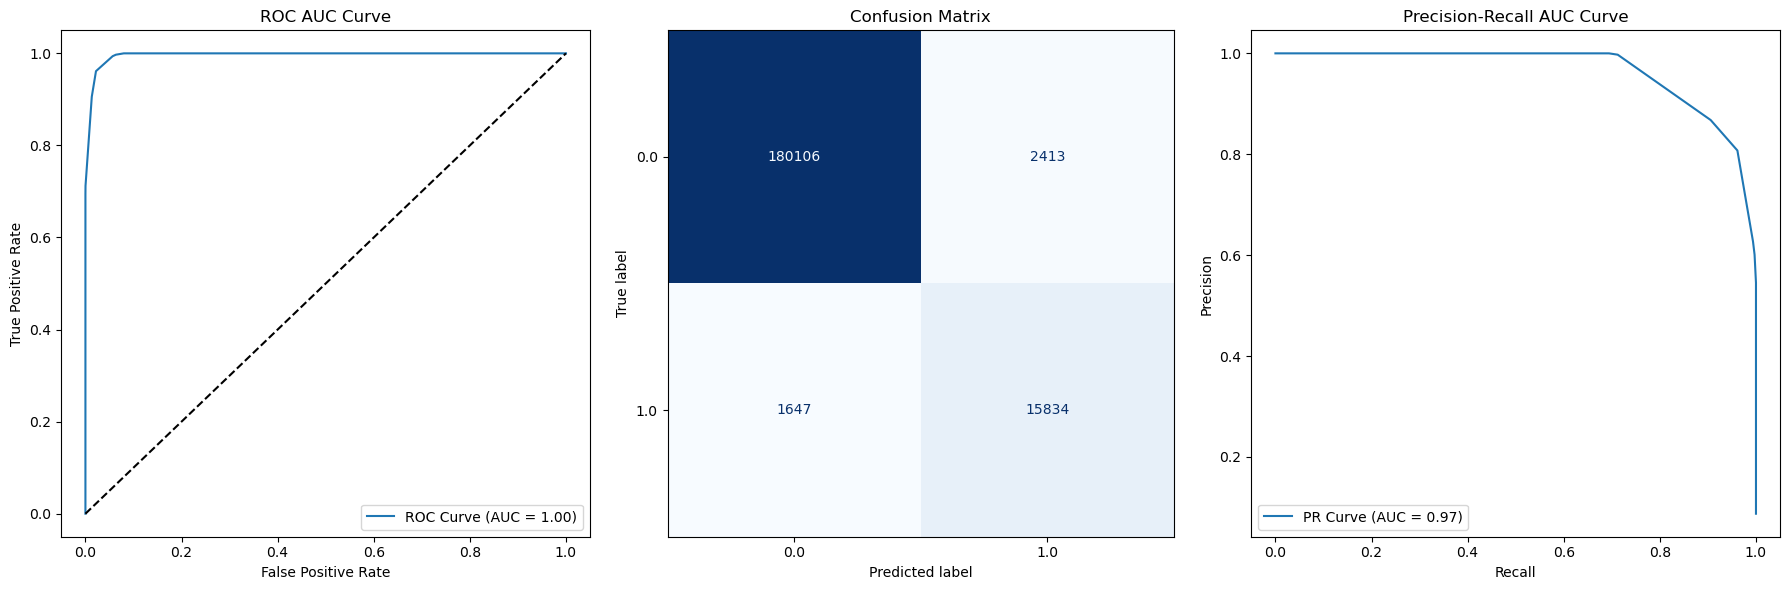

In [270]:
results_df = test_model(data, target='fraud', model_name="DecisionTreeClassifier", cv_folds=1, 
                        sampling='default', show_plots=True, return_results=True)

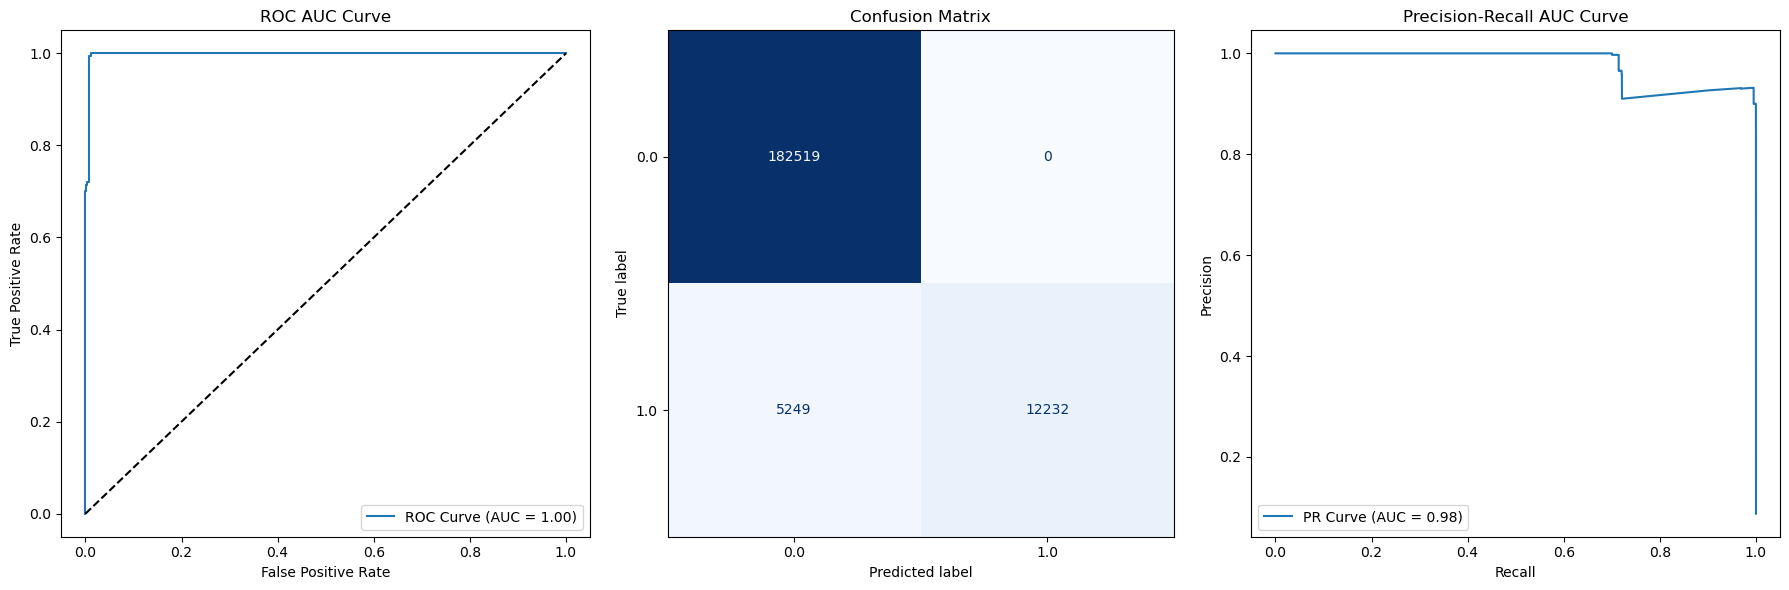

In [271]:
results_df = test_model(data, target='fraud', 
                        model_name="RandomForestClassifier", 
                        cv_folds=1, 
                        results_df=results_df, # keep scores of different runs
                        sampling='default', 
                        show_plots=True, 
                        return_results=True)

## Performance Metrics: 
- Evaluate models using metrics like precision, recall, and F1-score, and understand the implications of these metrics in the context of fraud detection.

In [272]:
results_df

,Sampling Strategy,Model,CV Folds,Accuracy,Precision,Recall,AUC,F1
0,default,DecisionTreeClassifier,1,0.979700,0.867759,0.905783,0.996043,0.886364
1,default,RandomForestClassifier,1,0.973755,1.000000,0.699731,0.998047,0.823343


In [231]:
# Interpret the results achieved with default sampling strategy

## - Advanced Techniques (Extra Credit): 
- Implement data balancing, feature importance analysis, and cross-validation to enhance model performance and robustness.

### Data balancing and cross-validation

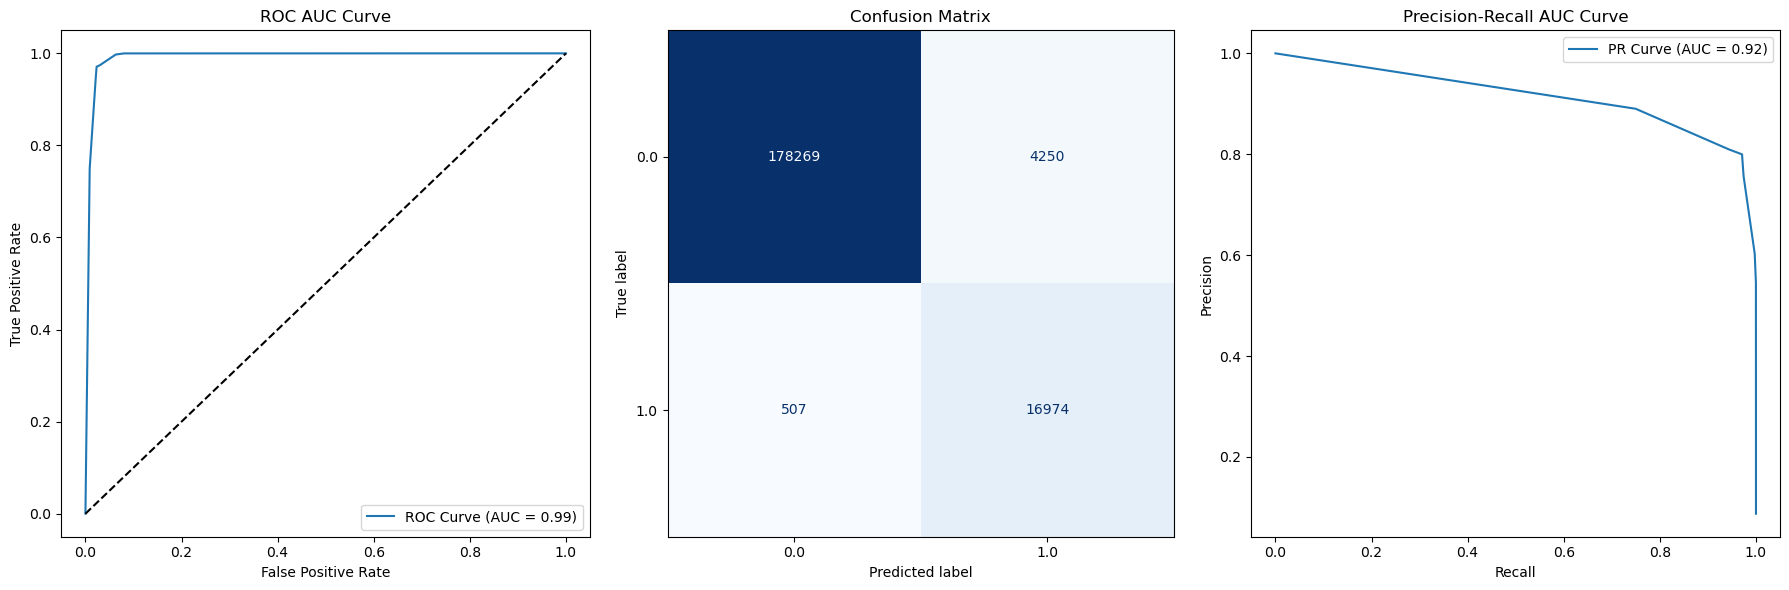

In [284]:
results_df = test_model(data, target='fraud', 
                        model_name="DecisionTreeClassifier", 
                        cv_folds=1, 
                        results_df=results_df,
                        sampling='ENN', 
                        show_plots=True, 
                        return_results=True)

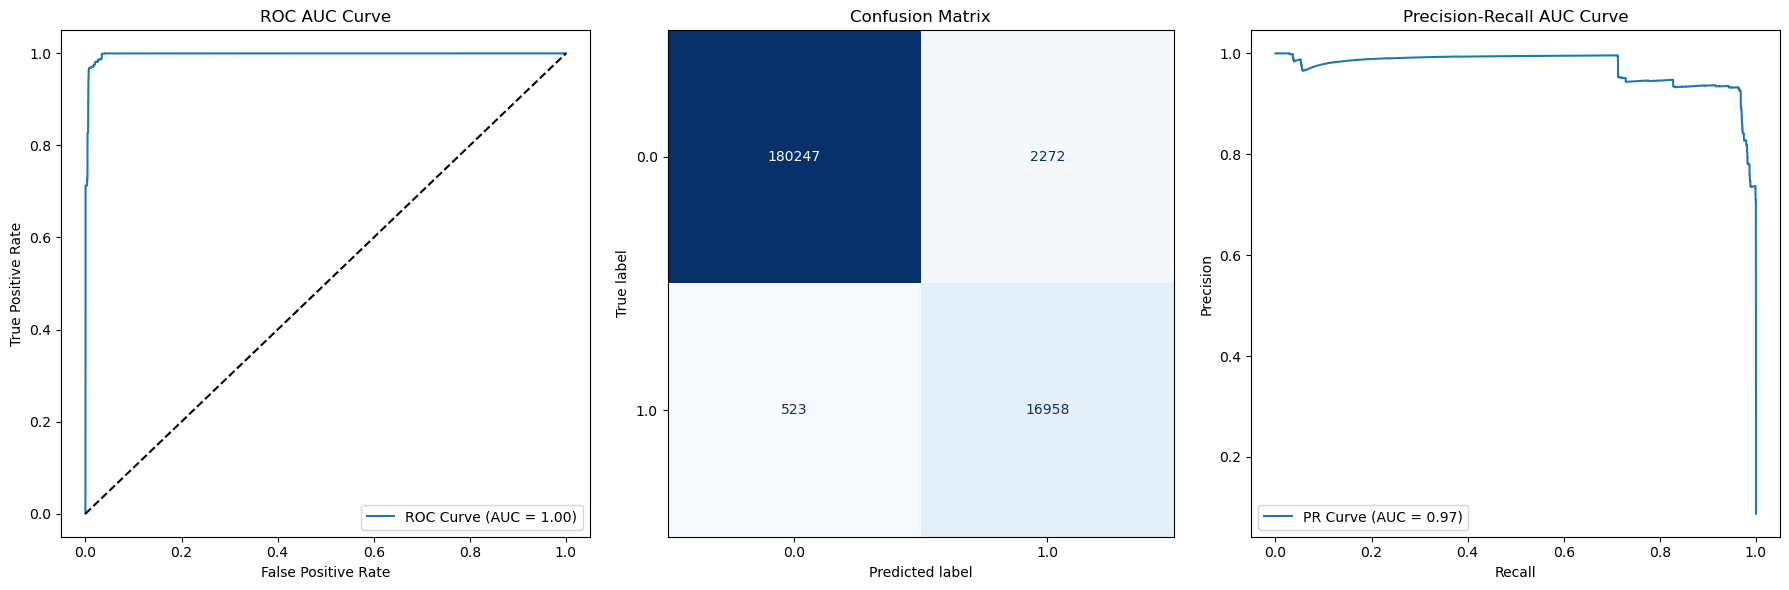

In [285]:
results_df = test_model(data, target='fraud', 
                        model_name="RandomForestClassifier", 
                        cv_folds=1, 
                        results_df=results_df,
                        sampling='ENN', 
                        show_plots=True, 
                        return_results=True)

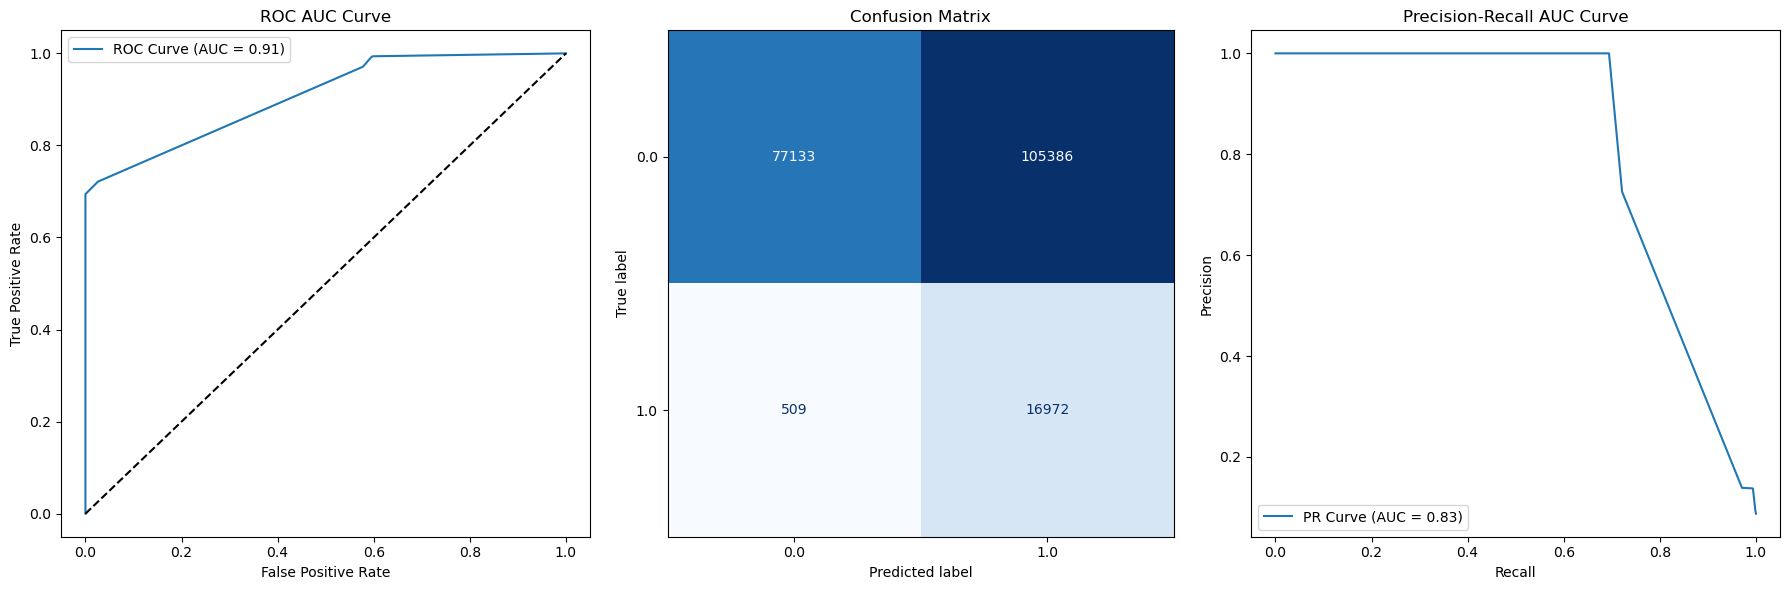

In [286]:
results_df = test_model(data, target='fraud', 
                        model_name="DecisionTreeClassifier", 
                        cv_folds=1, 
                        results_df=results_df,
                        sampling='NearMiss', 
                        show_plots=True, 
                        return_results=True)

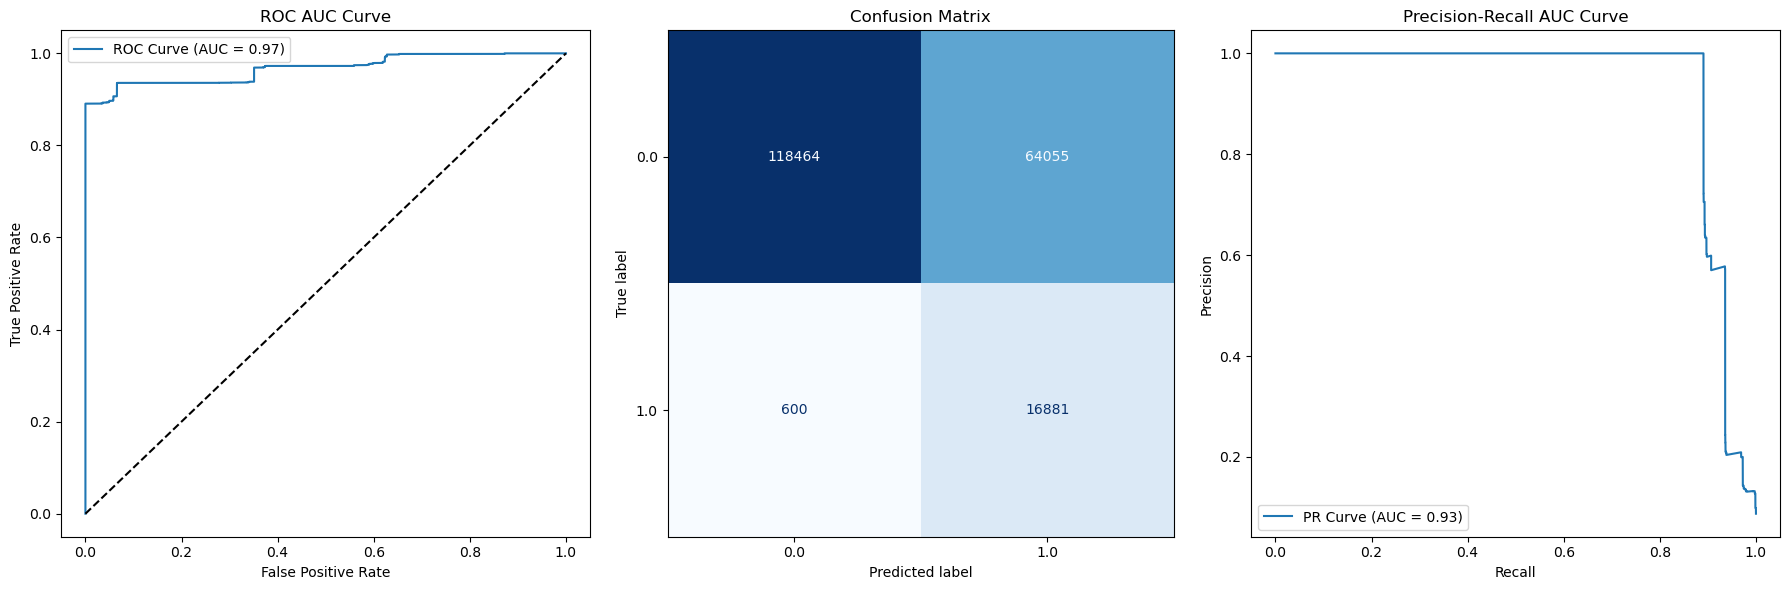

In [287]:
results_df = test_model(data, target='fraud', 
                        model_name="RandomForestClassifier", 
                        cv_folds=1, 
                        results_df=results_df,
                        sampling='NearMiss', 
                        show_plots=True, 
                        return_results=True)

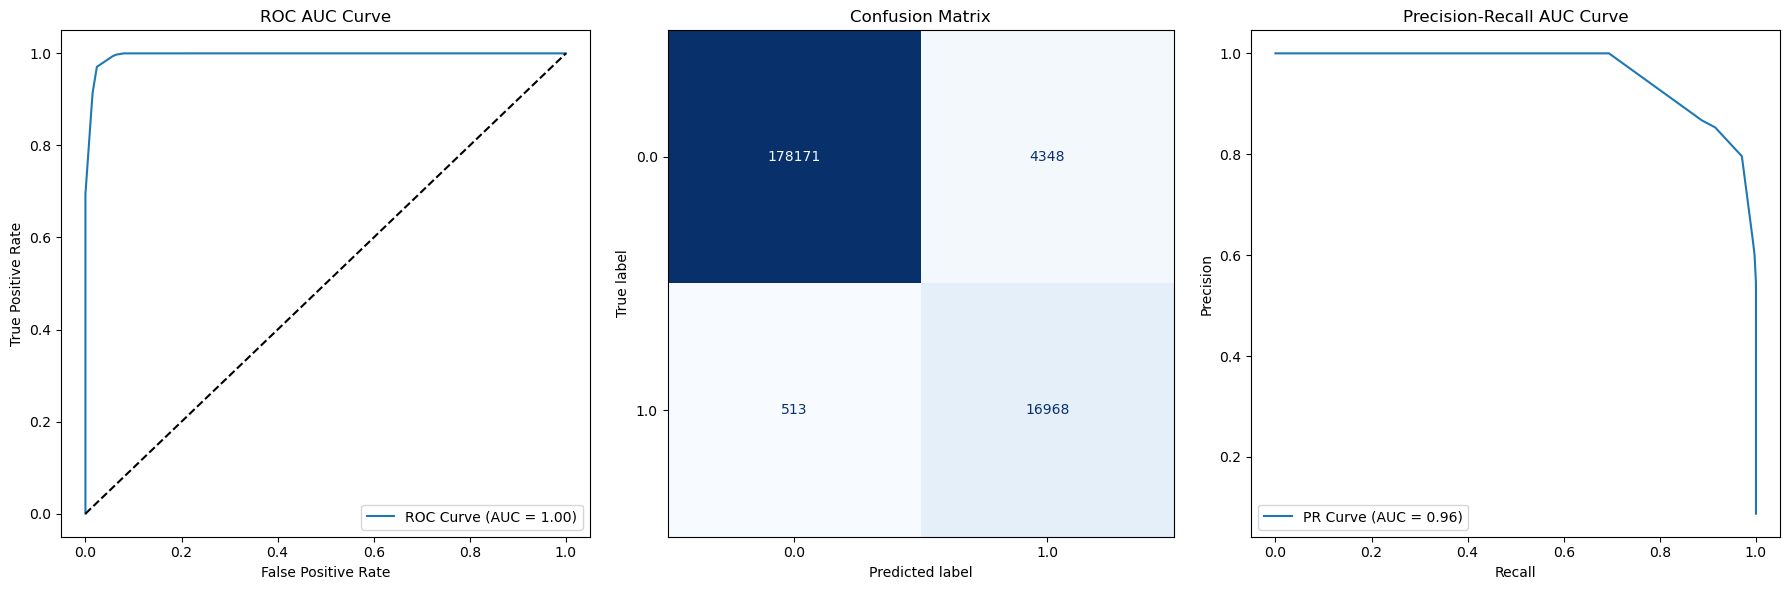

In [288]:
results_df = test_model(data, target='fraud', 
                        model_name="DecisionTreeClassifier", 
                        cv_folds=1, 
                        results_df=results_df,
                        sampling='SMOTE', 
                        show_plots=True, 
                        return_results=True)

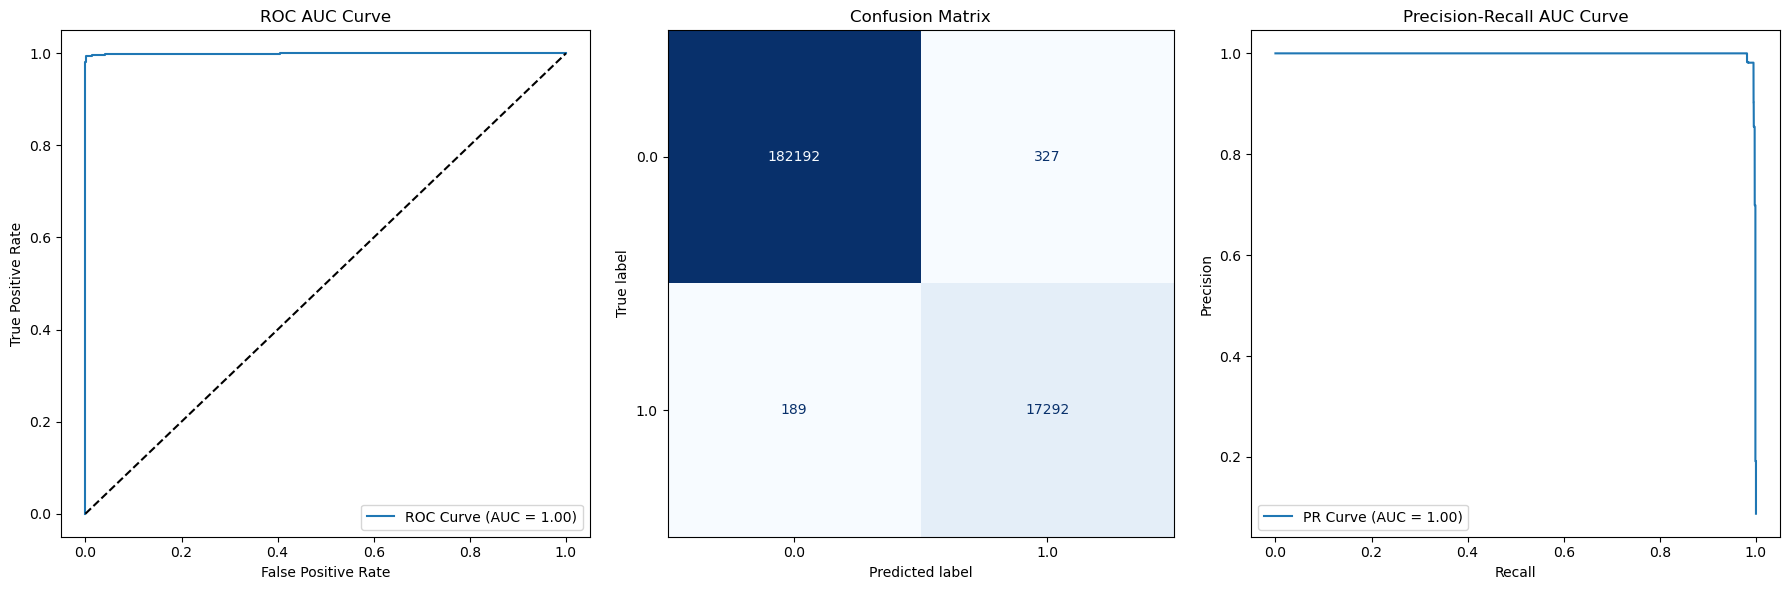

In [289]:
results_df = test_model(data, target='fraud', 
                        model_name="RandomForestClassifier", 
                        cv_folds=1, 
                        results_df=results_df, 
                        sampling='SMOTE', 
                        show_plots=True, return_results=True)

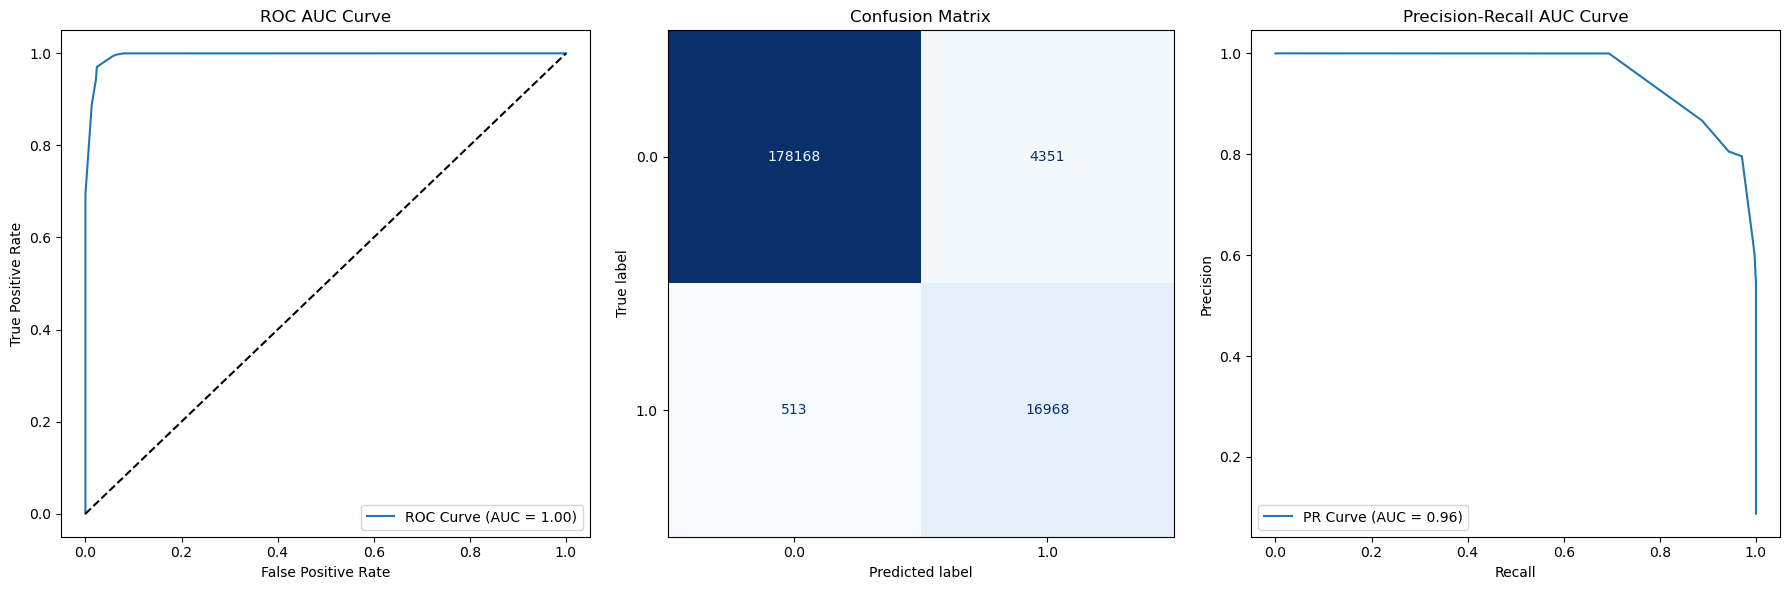

In [290]:
results_df = test_model(data, target='fraud', 
                        model_name="DecisionTreeClassifier", 
                        cv_folds=1, 
                        results_df=results_df,
                        sampling='SMOTEENN', 
                        show_plots=True, return_results=True)

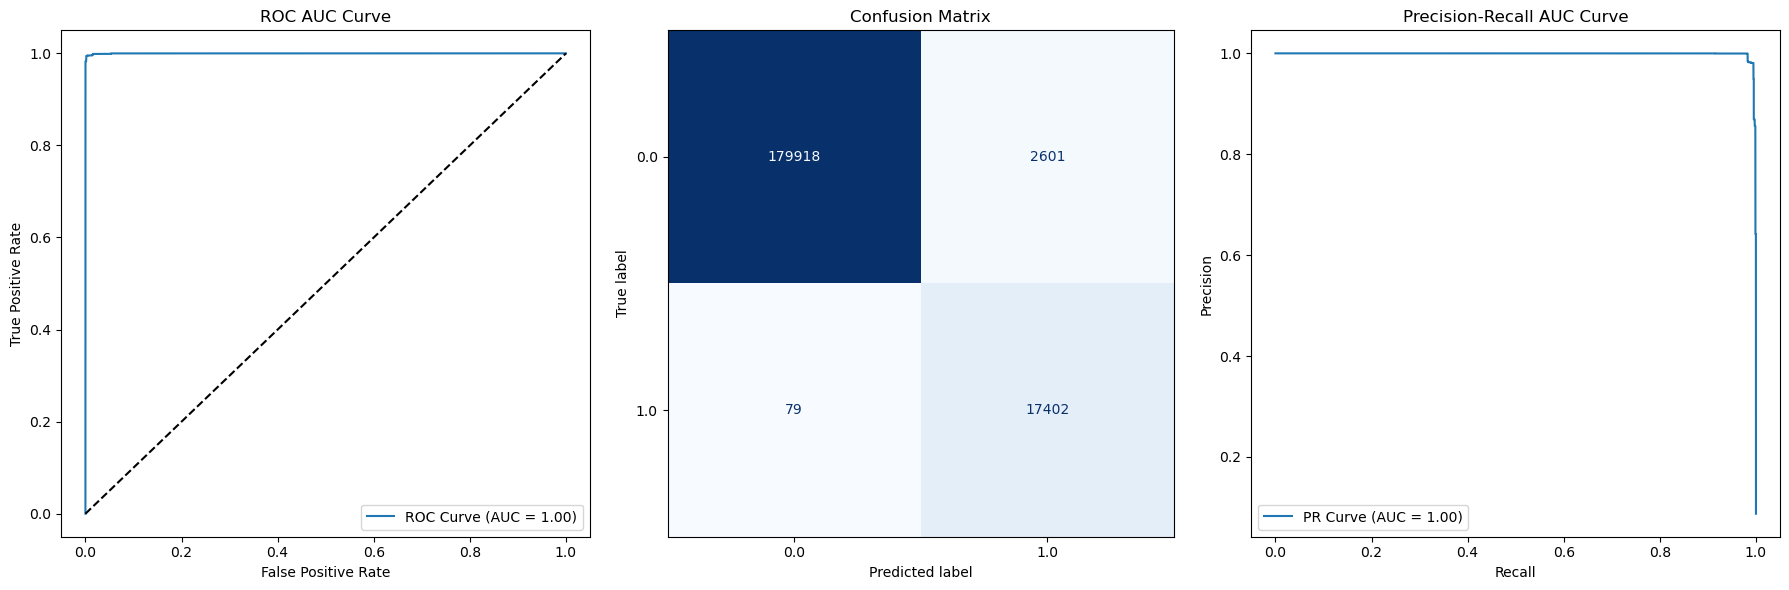

In [291]:
results_df = test_model(data, target='fraud', 
                        model_name="RandomForestClassifier", 
                        cv_folds=1, 
                        results_df=results_df, 
                        sampling='SMOTEENN', 
                        show_plots=True, return_results=True)

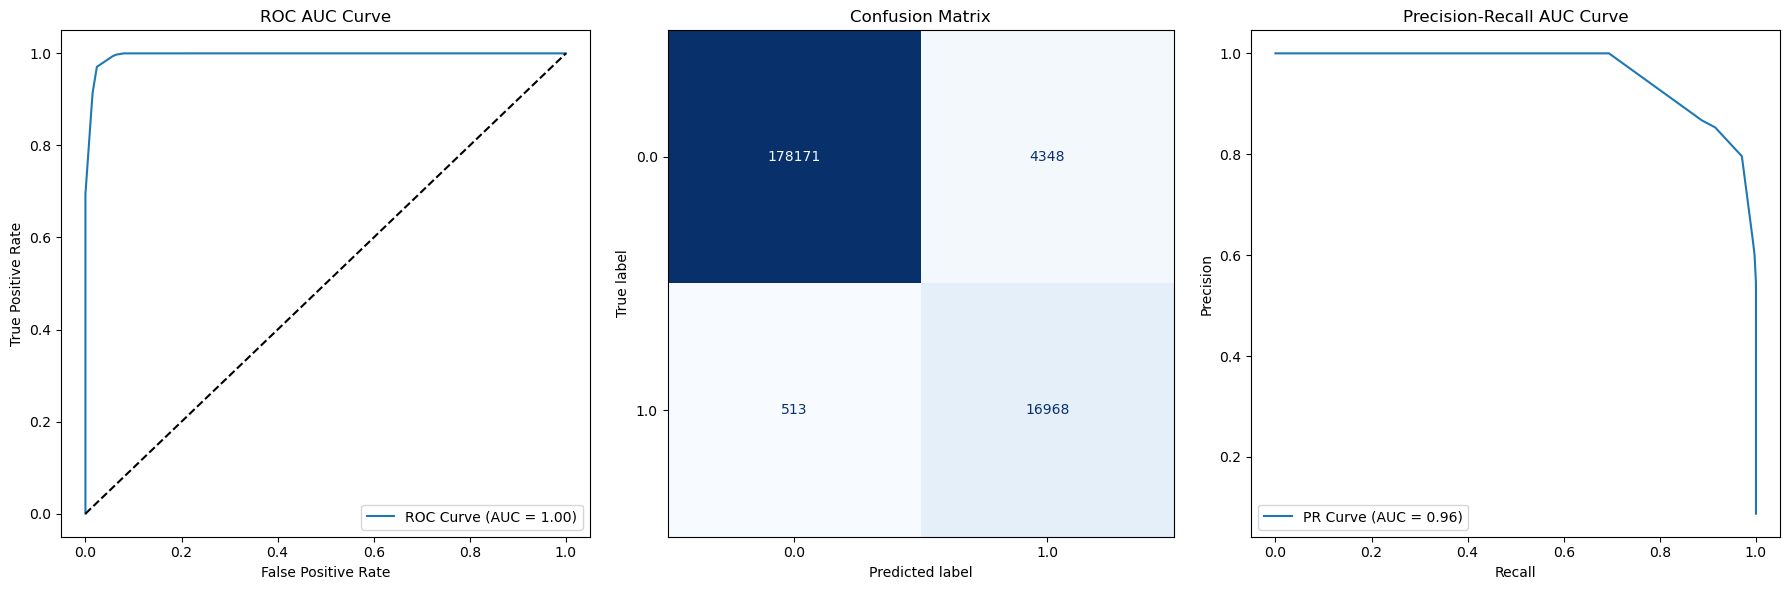

In [292]:
results_df = test_model(data, target='fraud', 
                        model_name="DecisionTreeClassifier", 
                        cv_folds=5, 
                        results_df=results_df,
                        sampling='SMOTE', 
                        show_plots=True, 
                        return_results=True)

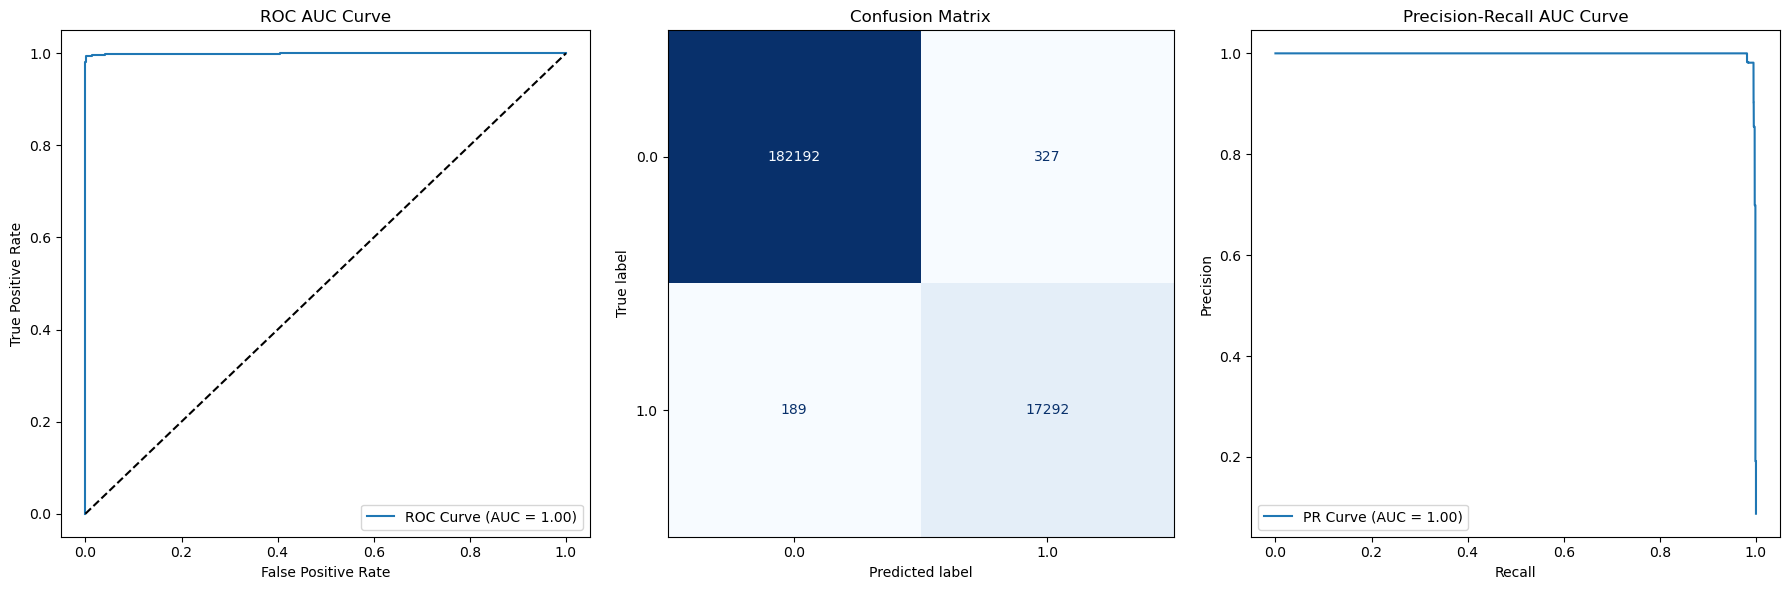

In [293]:
results_df = test_model(data, target='fraud', 
                        model_name="RandomForestClassifier", 
                        cv_folds=5, 
                        results_df=results_df, 
                        sampling='SMOTE', 
                        show_plots=True, return_results=True)

In [294]:
results_df

,Sampling Strategy,Model,CV Folds,Accuracy,Precision,Recall,AUC,F1
0,default,DecisionTreeClassifier,1,0.979700,0.867759,0.905783,0.996043,0.886364
1,default,RandomForestClassifier,1,0.973755,1.000000,0.699731,0.998047,0.823343
2,ENN,DecisionTreeClassifier,1,0.976215,0.799755,0.970997,0.991747,0.877096
3,ENN,RandomForestClassifier,1,0.986025,0.881851,0.970082,0.997686,0.923865
4,NearMiss,DecisionTreeClassifier,1,0.470525,0.138708,0.970883,0.905913,0.242736
5,NearMiss,RandomForestClassifier,1,0.676725,0.208572,0.965677,0.967193,0.343050
6,SMOTE,DecisionTreeClassifier,1,0.975695,0.796022,0.970654,0.995906,0.874707
7,SMOTE,RandomForestClassifier,1,0.997420,0.981440,0.989188,0.999393,0.985299
8,SMOTEENN,DecisionTreeClassifier,1,0.975680,0.795910,0.970654,0.995768,0.874639
9,SMOTEENN,RandomForestClassifier,1,0.986600,0.869970,0.995481,0.999856,0.928503


In [ ]:
# TODO: 1) Plot both AUC on the same plot and 2) Plot heatmap separatly
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Assuming y_true are your true labels and y_scores are the predicted scores
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)

# Create a new figure
fig, ax1 = plt.subplots()

# Plot ROC curve
ax1.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for PR curve
ax2 = ax1.twinx()
ax2.plot(recall, precision, color='g', label=f'PR curve (area = {pr_auc:.2f})')
ax2.set_ylabel('Precision', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Add legends
fig.tight_layout()
plt.title('ROC and PR Curves')
plt.show()

In [ ]:
# https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/heatmap.html

### Comparable feature importance with SHAP explainer

In [341]:
rfc, X_test = test_model(
            data=data,
            target='fraud',
            model_name='RandomForestClassifier',
            cv_folds=1,
            sampling='default',
            show_plots=False,
            return_results=False  # Get model and test data for SHAP
        )


In [342]:
explainer_rfc = shap.Explainer(rfc, X_train)

In [328]:
dtc, X_test = test_model(
            data=data,
            target='fraud',
            model_name='RandomForestClassifier',
            cv_folds=1,
            sampling='default',
            show_plots=False,
            return_results=False  # Get model and test data for SHAP
        )

In [343]:
explainer_dtc = shap.Explainer(dtc, X_train)

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

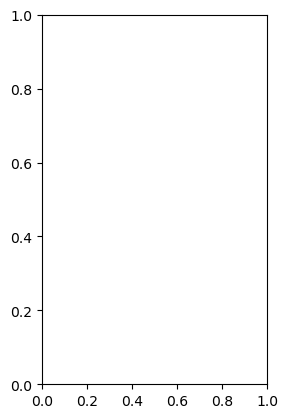

In [344]:
plt.figure()
plt.subplot(1,2,1)
shap.plots.beeswarm(explainer_rfc(X_test), max_display=10)
plt.subplot(1,2,2)
shap.plots.beeswarm(explainer_dtc(X_test), max_display=10)

# Optional for adjusting the margins:
plt.subplots_adjust(
    left=1,
    bottom=0.1, 
    right=3, 
    top=0.9
)

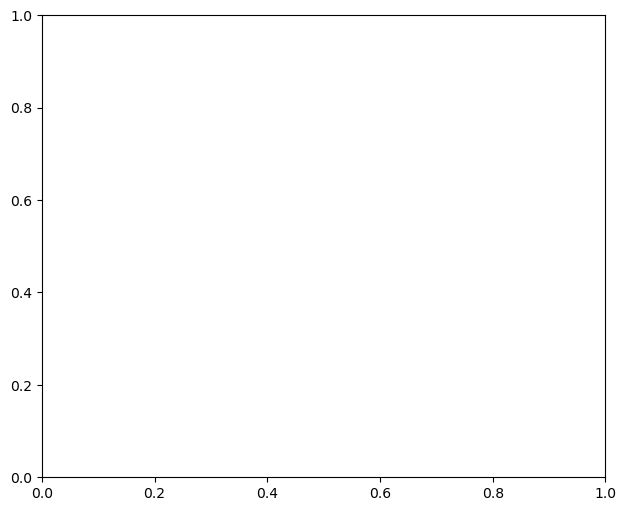

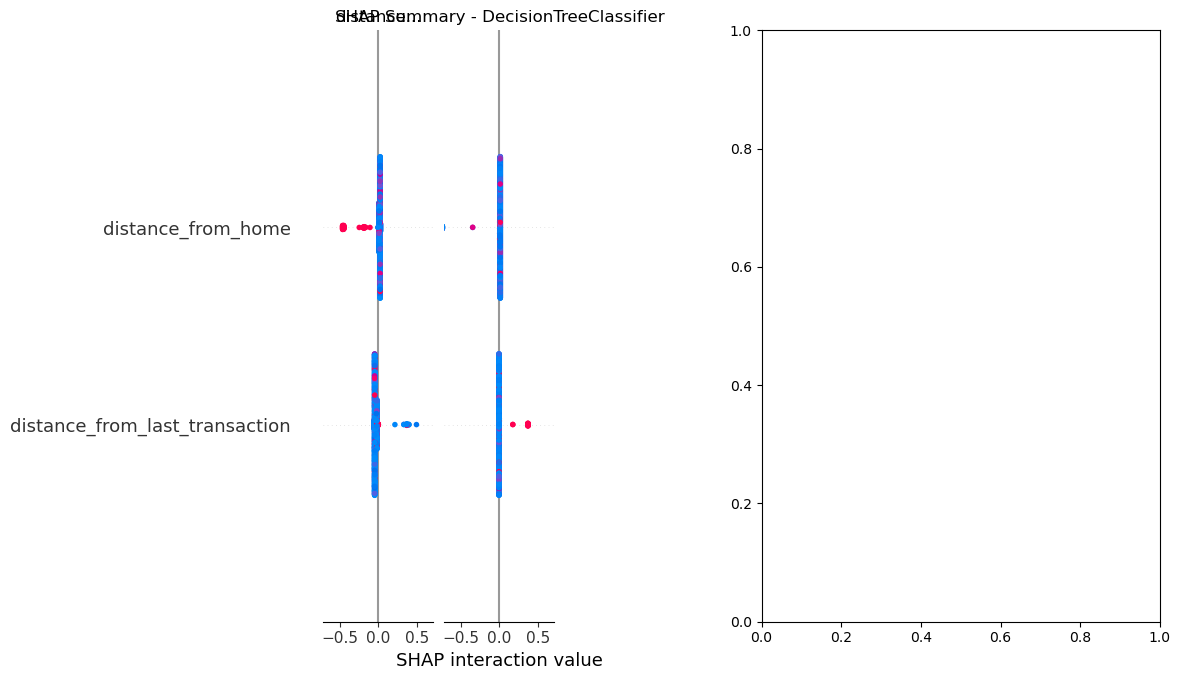

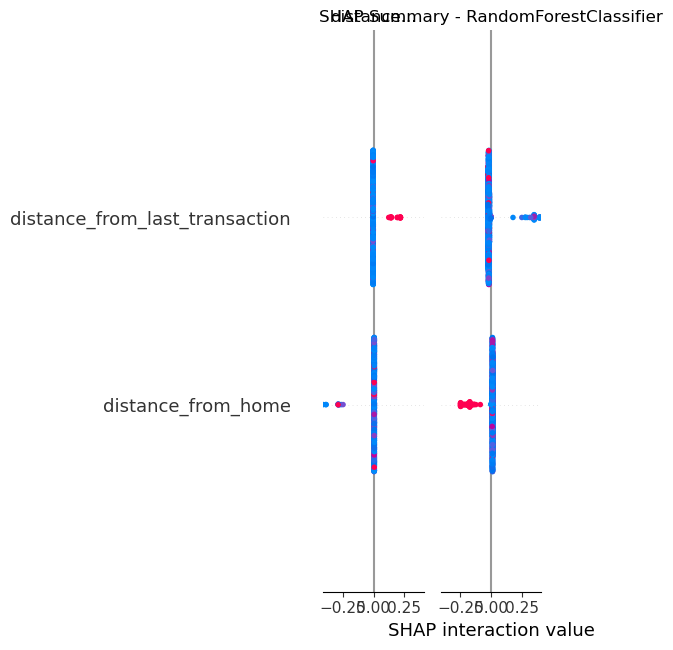

In [339]:
compare_tests(data, 'fraud', cv_folds=1, sampling='default')

Running test_model for DecisionTreeClassifier...
Running test_model for RandomForestClassifier...


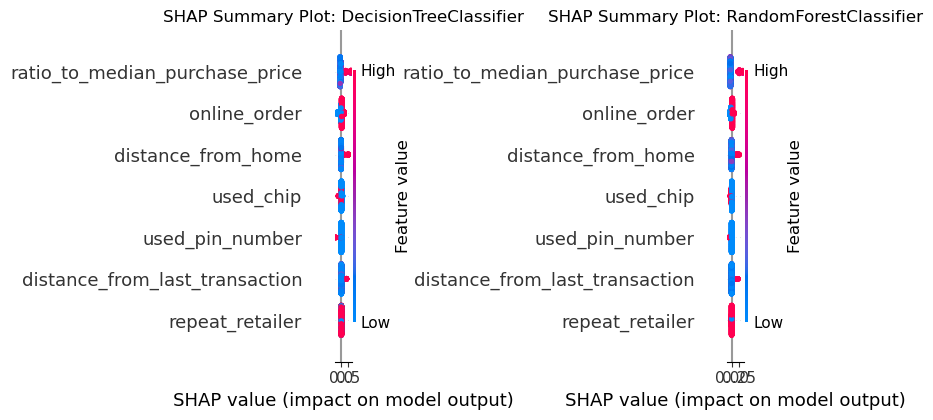

In [345]:
def compare_tests(data, target, model_params_list, cv_folds=1, sampling='default', show_plots=True):
    """
    Compare results of test_model for DecisionTreeClassifier and RandomForestClassifier,
    and visualize SHAP-based feature importances side by side.

    Parameters:
        data (pd.DataFrame): Dataset containing features and target.
        target (str): Name of the target variable.
        model_params_list (list of dict): List of dictionaries specifying 'model_name' and optional parameters.
        cv_folds (int): Number of cross-validation folds. Defaults to 1.
        sampling (str): Sampling strategy used in sample_data method. Defaults to 'default'.
        show_plots (bool): If True, visualize SHAP feature importances.

    Returns:
        None. Produces SHAP summary plots for two models side by side.
    """
    models = []
    model_names = []
    X_test_final = None

    for params in model_params_list:
        model_name = params.get('model_name', 'RandomForestClassifier')
        print(f"Running test_model for {model_name}...")

        # Run test_model to get fitted model and X_test
        fitted_model, X_test = test_model(
            data=data,
            target=target,
            model_name=model_name,
            cv_folds=cv_folds,
            sampling=sampling,
            show_plots=False,
            return_results=False  # Get model and test data for SHAP
        )

        models.append(fitted_model)
        model_names.append(model_name)

        # Ensure consistent X_test for both models
        if X_test_final is None:
            X_test_final = X_test

    # Ensure X_test is a DataFrame
    if not isinstance(X_test_final, pd.DataFrame):
        X_test_final = pd.DataFrame(X_test_final, columns=[f"Feature_{i}" for i in range(X_test_final.shape[1])])

    # Plot SHAP summary plots side by side
    if show_plots and len(models) == 2:
        fig, axes = plt.subplots(1, 2, figsize=(20, 8))

        for i, (model, model_name) in enumerate(zip(models, model_names)):
            # Switch SHAP Explainer to TreeExplainer for tree-based models
            explainer = shap.TreeExplainer(model, X_test_final)
            shap_values = explainer(X_test_final)

            # Handle multi-output SHAP values (e.g., binary classification)
            if shap_values.values.ndim == 3:
                shap_values_to_plot = shap_values[..., 1]  # Use SHAP values for class 1
            else:
                shap_values_to_plot = shap_values

            # Plot SHAP summary plot
            plt.subplot(1, 2, i + 1)
            shap.summary_plot(shap_values_to_plot, X_test_final, show=False)
            plt.title(f"SHAP Summary Plot: {model_name}")

        plt.tight_layout()
        plt.show()

# Example Usage:
model_params_list = [
    {"model_name": "DecisionTreeClassifier"},
    {"model_name": "RandomForestClassifier"}
]

compare_tests(
    data=data,
    target='fraud',
    model_params_list=model_params_list,
    cv_folds=1,
    sampling='default',
    show_plots=True
)




In [ ]:
compare_tests(data, target='fraud', model_params_list=model_params_list, cv_folds=1, sampling='SMOTE', show_plots=True)

## Discussion
**Note on feature importances produced by different tree-based algorithms:**
- Decision Trees: A single decision tree is built greedily to minimize a criterion (e.g., Gini impurity or entropy). The feature importance reflects the splitting decisions of this single tree and is prone to overfitting and instability, especially if the tree is deep or the dataset is small.
- Random Forests: Aggregate results from multiple trees. The importance of a feature is averaged across all trees, leading to a more stable and robust estimation. Random Forests also introduce randomness in feature selection and data sampling (bootstrapping), reducing the dominance of spurious patterns in the data. In other words, aggregating accross numerous trees is making them less sensitive to noise and random fluctuations in the data.
- XGBoost: Constructs trees sequentially, optimizing a loss function. It uses regularization (e.g., penalizing large weights) and other mechanisms (e.g., shrinkage, subsampling) to produce more generalizable results. Feature importance here is influenced by how much a feature contributes to reducing the loss during training. Generally, it produces better estimates of features' importances, especially in the presence of correlated features or complex relationships, what is not a big concern in this case.

**Note on feature importances produced in training vs testing runs:**
1. Feature Importance from the Training Set
Feature importance calculated during training reflects the contribution of each feature within the context of the model's learning process. It is determined based on metrics such as:

Reduction in impurity: For decision trees and ensembles (e.g., Random Forests), this measures how much a feature contributes to reducing impurity (like Gini or entropy).
Gain or contribution: For gradient-boosted models (e.g., XGBoost, LightGBM), it measures how much a feature improves the model's objective function during training.
Since this is computed on the same data used to train the model, it is more likely to:

Overestimate the importance of features due to overfitting.
Highlight the features that the model has optimized on, including those that might not generalize well to unseen data.

2. Feature Importance During Inference (Test Data)
Feature importance during inference is evaluated based on how features impact predictions for new, unseen data. It can be assessed through methods such as:

Permutation Importance: Measuring the decrease in model performance (e.g., accuracy, RMSE) when a feature's values are randomly shuffled, breaking its relationship with the target.
SHAP (SHapley Additive exPlanations): Quantifying the marginal contribution of each feature to the model's predictions for individual instances.
Key characteristics:

Provides a more realistic estimate of a feature's importance because it reflects the model's performance on unseen data.
Can highlight how well the model generalizes, potentially exposing features that had high importance during training but lower relevance for test/inference data.

3. Why is There a Difference?
Overfitting: Features that are highly important on the training set might not generalize to test data, leading to discrepancies in importance.
Data Distribution Shifts: If the test dataset distribution differs from the training set (e.g., due to sampling bias or domain shift), feature importance may change.
Interactions and Dependencies: The way features interact with each other or with the target variable may differ between the training and test datasets.
Noise and Spurious Correlations: Features that had high importance in training due to spurious correlations may have diminished importance during inference.

4. Which Feature Importance Should You Use?
For model understanding and debugging: Use training-set feature importance to understand how the model was trained and which features influenced its learning process.
For interpretability and generalization analysis: Use test-set (or inference) feature importance, such as permutation importance or SHAP values, as they better reflect the model's real-world behavior.
Practical Recommendation:
Compare both training and test feature importances. Large discrepancies might indicate overfitting or data issues.
Use tools like SHAP or LIME for localized, instance-level insights during inference to get a nuanced understanding of feature contributions.

Sum up:
Training/Estimation importance often relies on impurity-based metrics (e.g., Gini, information gain).
Testing/Inference importance might use permutation importance or SHAP, which are influenced by the model's performance on specific datasets.


How SHAP Helps Compare Feature Importance
Local and Global Interpretability:
SHAP provides both local (instance-level) and global (dataset-level) insights into feature importance12.
It quantifies each feature's contribution to individual predictions, allowing for detailed comparison across models13.
Model-Agnostic Explanation:
SHAP values are consistent across different models, making them suitable for comparing feature importance between different tree-based classifiers like Random Forests and XGBoost35.
Visual Tools for Comparison:
SHAP summary plots can visually compare the impact of features across models by displaying the distribution of SHAP values for each feature4.
This helps identify which features consistently contribute to predictions across different models.
Handling Complex Interactions:
SHAP effectively captures complex interactions between features, which is particularly useful for tree-based models that naturally handle non-linear relationships5.
By using shap.TreeExplainer(model) to compute SHAP values for X_test, you can obtain a detailed breakdown of how each feature contributes to predictions in different tree-based classifiers. This allows for a direct comparison of feature importance, highlighting differences in how models utilize features for making predictions.